# Prognostoma

#### Context: 
Glioblastoma multiforme (GBM)is the most common and aggressive form of brain tumor in adults. (52 % of all primary brain tumors) with a poor prognosis of 12-15 months.

#### Need: 
Despite advances in the surgical and oncological treatment of GB, prognosis is still poor, with a 5-year survival rate of between 0.05% and 4.7%.The standard care are unable to prolong the remission and the investigative treatments introduced over past three decades have only been able to prolong the survival of patients by an average of three months. Further, these standard care put impose financial burden on the patient and the caregivers. Healthcare costs associated with GBM are extremely high. With limited resources and risisng healthcare costs,it is pertinent to evaluate the not only the cost but also the value of the treatment. 

Doctors typically estimate a patient’s likelihood of being cured, their extent of functional recovery, and their life expectancy by looking at studies of groups of people with the same or similar diagnosis. A person’s prognosis is always an estimate, and multiple studies have shown that it is often a rough estimate. 

#### Vison:
A predictive tool that considers the patient demographics,geneteic and medical history to predict the prognosis which can help doctor and patient make an informed descision. 

#### Output for Stakeholders: 
1. Doctors: Helps them to decide the treatment strategy considering multiple factors that affect the success of the treatment and properly advise the patient not simply based on a reasonable guess. Improves doctors efficiency in providing effective treatment and increases the clinical productivity. 
2. Patient: To make an informed choice about the treatment based on the survival chances, quality of life and insurance coverage.

#### Steps to predict prognosis:
1. Data loading and exploration
2. Data cleaning - Remove outliers, Impute missing values, Evaluate correlation and skewness.
3. Evalaute machine learning models to predict prognosis


In [1]:
# Import required databases
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #matplotlib is a great plotting library
plt.style.use('ggplot') #this adds a customised style to  plots
%matplotlib inline      
import math
import scipy.stats as ss

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Machine Learning Models and metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

# To show the complete table
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1) 

In [2]:
# Check the versions
print('The NumPy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))


The NumPy version is 1.16.5.
The pandas version is 0.25.1.


In [3]:
# read data
df1 = pd.read_csv("combined_study_clinical_data.tsv",sep='\t')
df1.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Neoplasm Histologic Grade,Morphology,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Treatment Details before PDX,Tumor Location,WHO Class,Year of initial pathologic diagnosis,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Days to Sample Procurement,Disease Free (Months),Disease Free Status,Disease code,Performance Status,Ethnicity Category,Form completion date,Fraction Genome Altered,Neoplasm Histologic Type Name,History lgg dx of brain tissue,Neoadjuvant Therapy Type Administered Prior To Resection Text,Prior Cancer Diagnosis Occurence,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Year Cancer Initial Diagnosis,Is FFPE,Karnofsky Performance Score,Longest Dimension,First Pathologic Diagnosis Biospecimen Acquisition Method Type,First Pathologic Diagnosis Biospecimen Acquisition Other Method Type,First Pathologic Diagnosis Biospecimen Acquisition Method Type.1,New Neoplasm Event Post Initial Therapy Indicator,Oct embedded,Specimen Collection Method,Other Patient ID,Other Sample ID,Pathology Report File Name,Pathology report uuid,Performance Status Assessment Timepoint Category,Adjuvant Postoperative Pharmaceutical Therapy Administered Indicator,Patient Primary Tumor Site,Project code,Tissue Prospective Collection Indicator,Race Category,Did patient start adjuvant postoperative radiotherapy?,Tissue Retrospective Collection Indicator,Sample Initial Weight,Sample type id,Shortest Dimension,Tumor Tissue Site,Specimen Current Weight,Specimen Freezing Means,Specimen Second Longest Dimension,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Primary Therapy Outcome Success Type,Person Neoplasm Status,Vial number,Patient's Vital Status
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-10,40.0,Glioma,Glioblastoma Multiforme,II,Oligoastrocytoma,173.0,GBM,30.00,DECEASED,1,Recurrence/progression,Male,Matched,"RT, BCNU, Thalidomide, Carboplatin, TMZ",Right temporal,"Glioblastoma, IDH-wildtype",1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-102,Mayo-PDX-Sarkaria-102,67.0,Glioma,Glioblastoma Multiforme,IV,Fibrillary,1755.0,GBM,21.00,DECEASED,1,Recurrence,Male,Matched,"RT, TMZ",Left parietal,"Glioblastoma, IDH-wildtype",2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-108,Mayo-PDX-Sarkaria-108,62.0,Glioma,Glioblastoma Multiforme,NaN,Small cell,158.0,GBM,8.04,DECEASED,1,Primary,Male,Matched,None,Left frontal,"Glioblastoma, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-110,Mayo-PDX-Sarkaria-110,64.0,Glioma,Glioblastoma Multiforme,NaN,PNET,161.0,GBM,25.92,DECEASED,1,Primary,Female,Matched,None,Left frontal,"Glioblastoma with primitive neuronal component, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkari

In [4]:
# genetics data
df1_gene = pd.read_csv("cna699.txt",delimiter="\t")
df1_gene.head()

,STUDY_ID,SAMPLE_ID,PTEN,EGFR,TP53,IDH1
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-3,-2,2,0,0
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-5,0,1,0,0
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-6,-1,2,0,0
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-8,0,2,0,0
4,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-9,0,0,0,0


In [5]:
# Match the name of the samples in both the data sets
df1.rename(columns = {'Study ID':'STUDY_ID','Sample ID':'SAMPLE_ID'},inplace = True)
df1.head()

,STUDY_ID,Patient ID,SAMPLE_ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Neoplasm Histologic Grade,Morphology,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Treatment Details before PDX,Tumor Location,WHO Class,Year of initial pathologic diagnosis,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Days to Sample Procurement,Disease Free (Months),Disease Free Status,Disease code,Performance Status,Ethnicity Category,Form completion date,Fraction Genome Altered,Neoplasm Histologic Type Name,History lgg dx of brain tissue,Neoadjuvant Therapy Type Administered Prior To Resection Text,Prior Cancer Diagnosis Occurence,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Year Cancer Initial Diagnosis,Is FFPE,Karnofsky Performance Score,Longest Dimension,First Pathologic Diagnosis Biospecimen Acquisition Method Type,First Pathologic Diagnosis Biospecimen Acquisition Other Method Type,First Pathologic Diagnosis Biospecimen Acquisition Method Type.1,New Neoplasm Event Post Initial Therapy Indicator,Oct embedded,Specimen Collection Method,Other Patient ID,Other Sample ID,Pathology Report File Name,Pathology report uuid,Performance Status Assessment Timepoint Category,Adjuvant Postoperative Pharmaceutical Therapy Administered Indicator,Patient Primary Tumor Site,Project code,Tissue Prospective Collection Indicator,Race Category,Did patient start adjuvant postoperative radiotherapy?,Tissue Retrospective Collection Indicator,Sample Initial Weight,Sample type id,Shortest Dimension,Tumor Tissue Site,Specimen Current Weight,Specimen Freezing Means,Specimen Second Longest Dimension,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Primary Therapy Outcome Success Type,Person Neoplasm Status,Vial number,Patient's Vital Status
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-10,40.0,Glioma,Glioblastoma Multiforme,II,Oligoastrocytoma,173.0,GBM,30.00,DECEASED,1,Recurrence/progression,Male,Matched,"RT, BCNU, Thalidomide, Carboplatin, TMZ",Right temporal,"Glioblastoma, IDH-wildtype",1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-102,Mayo-PDX-Sarkaria-102,67.0,Glioma,Glioblastoma Multiforme,IV,Fibrillary,1755.0,GBM,21.00,DECEASED,1,Recurrence,Male,Matched,"RT, TMZ",Left parietal,"Glioblastoma, IDH-wildtype",2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-108,Mayo-PDX-Sarkaria-108,62.0,Glioma,Glioblastoma Multiforme,NaN,Small cell,158.0,GBM,8.04,DECEASED,1,Primary,Male,Matched,None,Left frontal,"Glioblastoma, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-110,Mayo-PDX-Sarkaria-110,64.0,Glioma,Glioblastoma Multiforme,NaN,PNET,161.0,GBM,25.92,DECEASED,1,Primary,Female,Matched,None,Left frontal,"Glioblastoma with primitive neuronal component, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkari

In [6]:
# merging the two dataframes
df1g= pd.merge(df1,df1_gene,how="inner",on=['STUDY_ID',"SAMPLE_ID"])
df1g.head()

,STUDY_ID,Patient ID,SAMPLE_ID,Diagnosis Age,Cancer Type,Cancer Type Detailed,Neoplasm Histologic Grade,Morphology,Mutation Count,Oncotree Code,Overall Survival (Months),Overall Survival Status,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Treatment Details before PDX,Tumor Location,WHO Class,Year of initial pathologic diagnosis,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,Days to Sample Procurement,Disease Free (Months),Disease Free Status,Disease code,Performance Status,Ethnicity Category,Form completion date,Fraction Genome Altered,Neoplasm Histologic Type Name,History lgg dx of brain tissue,Neoadjuvant Therapy Type Administered Prior To Resection Text,Prior Cancer Diagnosis Occurence,ICD-10 Classification,"International Classification of Diseases for Oncology, Third Edition ICD-O-3 Histology Code","International Classification of Diseases for Oncology, Third Edition ICD-O-3 Site Code",Informed consent verified,Year Cancer Initial Diagnosis,Is FFPE,Karnofsky Performance Score,Longest Dimension,First Pathologic Diagnosis Biospecimen Acquisition Method Type,First Pathologic Diagnosis Biospecimen Acquisition Other Method Type,First Pathologic Diagnosis Biospecimen Acquisition Method Type.1,New Neoplasm Event Post Initial Therapy Indicator,Oct embedded,Specimen Collection Method,Other Patient ID,Other Sample ID,Pathology Report File Name,Pathology report uuid,Performance Status Assessment Timepoint Category,Adjuvant Postoperative Pharmaceutical Therapy Administered Indicator,Patient Primary Tumor Site,Project code,Tissue Prospective Collection Indicator,Race Category,Did patient start adjuvant postoperative radiotherapy?,Tissue Retrospective Collection Indicator,Sample Initial Weight,Sample type id,Shortest Dimension,Tumor Tissue Site,Specimen Current Weight,Specimen Freezing Means,Specimen Second Longest Dimension,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Primary Therapy Outcome Success Type,Person Neoplasm Status,Vial number,Patient's Vital Status,PTEN,EGFR,TP53,IDH1
0,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-10,Mayo-PDX-Sarkaria-10,40.0,Glioma,Glioblastoma Multiforme,II,Oligoastrocytoma,173.0,GBM,30.00,DECEASED,1,Recurrence/progression,Male,Matched,"RT, BCNU, Thalidomide, Carboplatin, TMZ",Right temporal,"Glioblastoma, IDH-wildtype",1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-102,Mayo-PDX-Sarkaria-102,67.0,Glioma,Glioblastoma Multiforme,IV,Fibrillary,1755.0,GBM,21.00,DECEASED,1,Recurrence,Male,Matched,"RT, TMZ",Left parietal,"Glioblastoma, IDH-wildtype",2007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,1,0,0
2,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-108,Mayo-PDX-Sarkaria-108,62.0,Glioma,Glioblastoma Multiforme,NaN,Small cell,158.0,GBM,8.04,DECEASED,1,Primary,Male,Matched,None,Left frontal,"Glioblastoma, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,2,0,0
3,gbm_mayo_pdx_sarkaria_2019,Mayo-PDX-Sarkaria-110,Mayo-PDX-Sarkaria-110,64.0,Glioma,Glioblastoma Multiforme,NaN,PNET,161.0,GBM,25.92,DECEASED,1,Primary,Female,Matched,None,Left frontal,"Glioblastoma with primitive neuronal component, IDH-wildtype",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
# See the column data types and non-missing values
df1g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 659
Data columns (total 78 columns):
STUDY_ID                                                                                       660 non-null object
Patient ID                                                                                     660 non-null object
SAMPLE_ID                                                                                      660 non-null object
Diagnosis Age                                                                                  654 non-null float64
Cancer Type                                                                                    660 non-null object
Cancer Type Detailed                                                                           660 non-null object
Neoplasm Histologic Grade                                                                      27 non-null object
Morphology                                                                                

In [8]:
# Replace all occurrences of Not Available with numpy not a number
df1g_n = df1g.replace({'Not Available': np.nan})

We will evaluate what percent of our dataset has Missing Values.To address that we use this function missing_values_tables which nicely represents the missing values in a table with percentage [1].  

In [9]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        display("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df1g_n)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

'Your selected dataframe has 78 columns.\nThere are 67 columns that have missing values.'

We will remove 29 columns.


In [11]:
# Drop the columns with >50% missing values
df1g_nn = df1g_n.drop(columns = list(missing_columns))

In [12]:
# check the target variable- Overall survival of the patient after diagnosis. 
df1g_nn['Overall Survival (Months)'].describe()

count    652.000000
mean     17.417331 
std      18.377031 
min      0.000000  
25%      6.232500  
50%      12.605000 
75%      20.907500 
max      127.500000
Name: Overall Survival (Months), dtype: float64

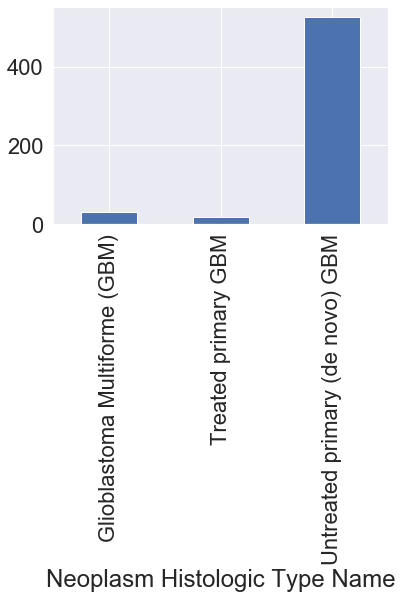

In [13]:
# This app is for people who just got initial diagnosis so we will focus on those people with untreated GBM.
df1g_nn.groupby('Neoplasm Histologic Type Name')["STUDY_ID"].count().plot(kind="bar")

In [14]:
# This app is for people who just got initial diagnosis so we will focus on those people with untreated GBM.
mask = df1g_nn['Neoplasm Histologic Type Name'] == 'Untreated primary (de novo) GBM'
df2 = df1g_nn[mask]
df2.shape

(525, 49)

## Evaluate the survival curve
Using the Lifeline algorithm, Kaplan Meier Estimator curve was plotted and evaluate how the survival varied based on gender, ethnicity or race of patient.

In [15]:
df_surv = df2.copy()
# Remove any columns with all na values
df1_surv = df_surv.dropna(subset =['Overall Survival (Months)'], inplace = True)

df1_surv= df_surv.replace({'Overall Survival Status': {'LIVING':False, 'DECEASED': True}})
df1_surv['Overall Survival Status'] = df1_surv['Overall Survival Status'].astype('bool')
df1_surv.groupby('Overall Survival Status')["Patient ID"].count()

Overall Survival Status
False    88 
True     435
Name: Patient ID, dtype: int64

We can easily see that only a small number of survival times are right-censored (Status is False (living)), i.e., most patient's died during the study period (Status is True)

In [16]:
missing_values_table(df1_surv)

'Your selected dataframe has 49 columns.\nThere are 13 columns that have missing values.'

,Missing Values,% of Total Values
Mutation Count,267,51.1
Performance Status Assessment Timepoint Category,182,34.8
Disease Free (Months),137,26.2
Disease Free Status,137,26.2
Karnofsky Performance Score,132,25.2
Ethnicity Category,85,16.3
Longest Dimension,68,13.0
Shortest Dimension,68,13.0
Specimen Second Longest Dimension,68,13.0
Person Neoplasm Status,51,9.8


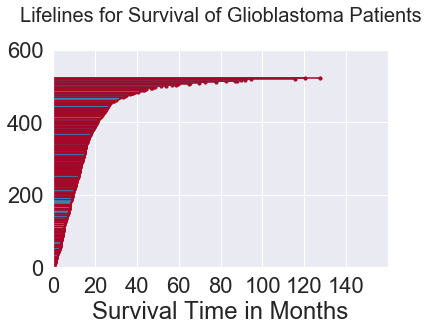

In [17]:
import lifelines
durations = df1_surv["Overall Survival (Months)"].values
events = df1_surv['Overall Survival Status'].values

ax = lifelines.plotting.plot_lifetimes(durations=durations,
                                       event_observed=events)
ax.set_xlim(0, 160)
ax.set_ylim(0, 600)
ax.grid(b=True, which='major', axis='both',)
ax.set_xticks(np.arange(0,160,20))
ax.set_xlabel("Survival Time in Months")
ax.set_title("Lifelines for Survival of Glioblastoma Patients\n",size=20);
plt.plot();

Blue lines show surviving patients at the time of data collection, red represents the dead patients for which the overall survival is known. Max patients survive less than 20 months.

Text(0.5, 0, 'time $t$ in months')

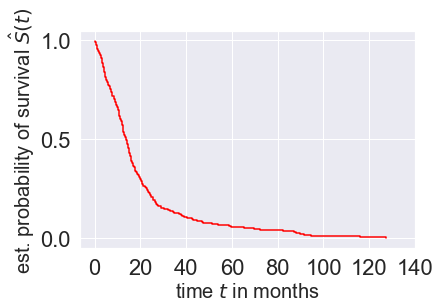

In [18]:
# Plot the Kaplan Meier Estimator curve
from sksurv.nonparametric import kaplan_meier_estimator
fig = plt.figure()
ax = fig.add_subplot(111)
time, survival_prob = kaplan_meier_estimator(df1_surv['Overall Survival Status'], df1_surv["Overall Survival (Months)"])
plt.step(time, survival_prob, where="post",color ='red')
plt.ylabel("est. probability of survival $\hat{S}(t)$",size = 20 )
ax.set_xticks(np.arange(0,160,20))
plt.xlabel("time $t$ in months",size = 20)

The estimated curve is a step function, with steps occuring at time points where one or more patients died. From the plot we can see that most patients died in the first 20 months, as indicated by the steep slope of the estimated survival function in the first 20 months.

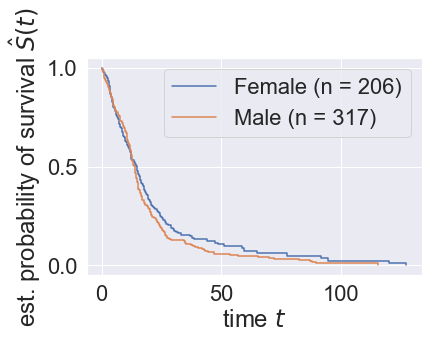

In [19]:
for value in df1_surv["Sex"].unique():
    mask = df1_surv["Sex"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(df1_surv['Overall Survival Status'][mask],
                                                           df1_surv["Overall Survival (Months)"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

The difference between the two estimated survival functions is too small to confidently argue that the sex affects survival or not.

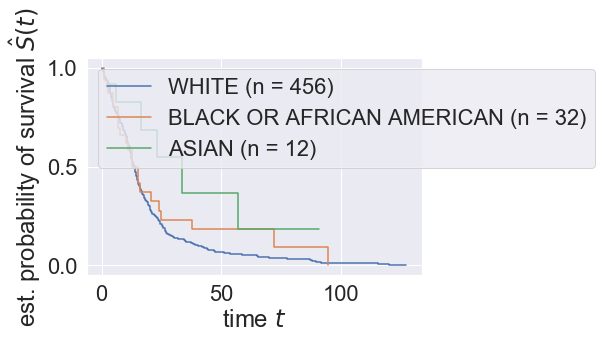

In [20]:
for value in df1_surv["Race Category"].dropna().unique():
    mask = df1_surv["Race Category"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(df1_surv['Overall Survival Status'][mask],
                                                           df1_surv["Overall Survival (Months)"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="upper left")

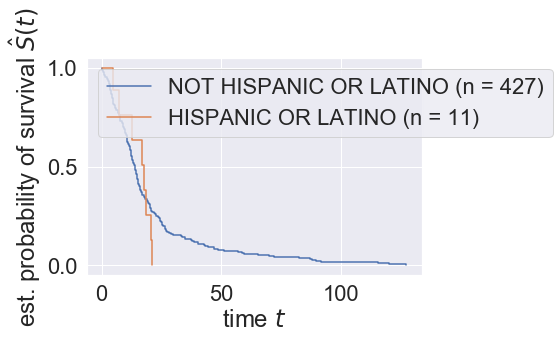

In [21]:
for value in df1_surv["Ethnicity Category"].dropna().unique():
    mask = df1_surv["Ethnicity Category"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(df1_surv['Overall Survival Status'][mask],
                                                           df1_surv["Overall Survival (Months)"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()))
    
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="upper left")

Our dataset is skewed for a population of white and not hispanic population. This is not a very informative graph regarding the survival based upon the ethnicity or race. 

## Preprocessing the data
The purpose is to make the dataset more tidy and ready for machine learning algorithms free of noise. This will help in making better predictions. We start by evaluating the dataset. Breifly we,
1. Idenitfy and remove the Outliers
2. Evaluate for Collinear features
3. One hot encode categorical features
4. Impute missing values
3. Transform the skewed features

we will perform the follwing steps in this order as removing outliers and collinear features sometimes addresses the issue of skweness. 

Text(0.5, 1.0, 'Overall Survival (Months) Distribution')

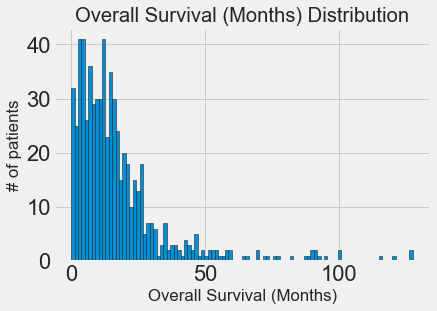

In [22]:
figsize=(8, 8)

# Histogram of the Overall survival
plt.style.use('fivethirtyeight')
plt.hist(df1g_nn['Overall Survival (Months)'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Overall Survival (Months)'); plt.ylabel('# of patients')
plt.title('Overall Survival (Months) Distribution')

The data is skewed with maximum patients surviving for a mean time of 17 months with 75% surviving for 21 months. So, we will remove the outliers.While removing an outlier, we remove outliers in between First Quartile−1∗Interquartile Range and Third Quartile+1∗Interquartile Range

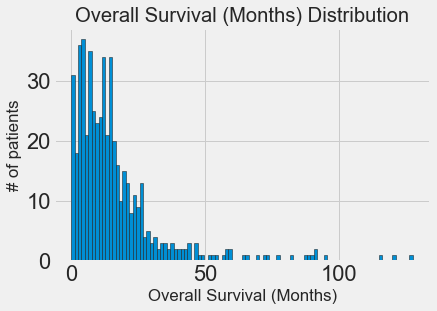

In [23]:
figsize=(8, 8)

# Histogram of the Overall survival
plt.style.use('fivethirtyeight')
plt.hist(df2['Overall Survival (Months)'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Overall Survival (Months)'); plt.ylabel('# of patients'); 
plt.title('Overall Survival (Months) Distribution');

In [24]:
# Calculate first and third quartile
first_quartile = df2['Overall Survival (Months)'].describe()['25%']
third_quartile = df2['Overall Survival (Months)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df2_new = df2[(df2['Overall Survival (Months)'] > (first_quartile - 1 * iqr)) &
            (df2['Overall Survival (Months)'] < (third_quartile + 1 * iqr))]
print (f'first_quartile: {first_quartile:0.2f} third_quartile: {third_quartile:0.2f} iqr:{iqr:0.2f}')
print(f" The range is {(first_quartile - 1 * iqr): 0.2f} to {(third_quartile + 1 * iqr):0.2f} months")

print (f" The shape of the new dataframe is {df2_new.shape}")

first_quartile: 5.75 third_quartile: 19.76 iqr:14.01
 The range is -8.26 to 33.77 months
 The shape of the new dataframe is (473, 49)


Text(0.5, 1.0, 'Overall Survival (Months) Distribution')

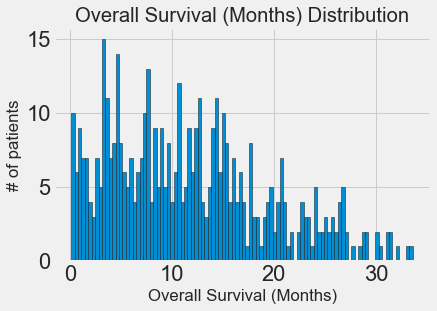

In [25]:
figsize=(8, 8)

# Histogram of the Overall survival
plt.style.use('fivethirtyeight')
plt.hist(df2_new['Overall Survival (Months)'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Overall Survival (Months)'); plt.ylabel('# of patients') 
plt.title('Overall Survival (Months) Distribution')

In [26]:
missing_values_table(df2)

'Your selected dataframe has 49 columns.\nThere are 16 columns that have missing values.'

,Missing Values,% of Total Values
Mutation Count,267,50.9
Performance Status Assessment Timepoint Category,184,35.0
Disease Free (Months),138,26.3
Disease Free Status,138,26.3
Karnofsky Performance Score,134,25.5
Ethnicity Category,86,16.4
Longest Dimension,68,13.0
Shortest Dimension,68,13.0
Specimen Second Longest Dimension,68,13.0
Person Neoplasm Status,52,9.9


As there are so many features which are for data collection like 'Oncotree Code': we are just focused on the same cancer type so that information is not pertinent here, 'Vial number', 'Patient's Vital Status(dead/alive)' etc are not required. We also ignored the disease free status beacuse we want to predict overall survival for patients with initial diagnosis.

In [27]:
# Select the relevant columns for further exploration
df3 = df2_new[['Patient ID', 'Diagnosis Age',
              'Overall Survival (Months)', 'Overall Survival Status','Sex',
             'Fraction Genome Altered','Karnofsky Performance Score', 'Longest Dimension',
             'Shortest Dimension','PTEN', 'EGFR', 'TP53', 'IDH1']]

In [28]:
# Determine the correlation between different variables
df3.corr()

,Diagnosis Age,Overall Survival (Months),Fraction Genome Altered,Karnofsky Performance Score,Longest Dimension,Shortest Dimension,PTEN,EGFR,TP53,IDH1
Diagnosis Age,1.000000,-0.310166,-0.007592,-0.252940,0.059831,0.131758,-0.159569,0.209365,-0.033688,-0.040332
Overall Survival (Months),-0.310166,1.000000,0.010431,0.260533,0.033047,-0.113736,-0.008509,-0.029486,0.077192,-0.006986
Fraction Genome Altered,-0.007592,0.010431,1.000000,-0.029114,0.018263,-0.131298,-0.005475,-0.114762,-0.196085,0.032060
Karnofsky Performance Score,-0.252940,0.260533,-0.029114,1.000000,0.052427,-0.066536,0.019442,-0.028926,0.046624,-0.010014
Longest Dimension,0.059831,0.033047,0.018263,0.052427,1.000000,0.149992,0.037281,0.059861,-0.055497,0.014089
Shortest Dimension,0.131758,-0.113736,-0.131298,-0.066536,0.149992,1.000000,0.016762,0.061372,-0.020964,-0.028420
PTEN,-0.159569,-0.008509,-0.005475,0.019442,0.037281,0.016762,1.000000,-0.225388,-0.036747,0.110774
EGFR,0.209365,-0.029486,-0.114762,-0.028926,0.059861,0.061372,-0.225388,1.000000,0.107069,0.026419
TP53,-0.033688,0.077192,-0.196085,0.046624,-0.055497,-0.020964,-0.036747,0.107069,1.000000,-0.074758
IDH1,-0.040332,-0.006986,0.032060,-0.010014,0.014089,-0.028420,0.110774,0.026419,-0.074758,1.000000


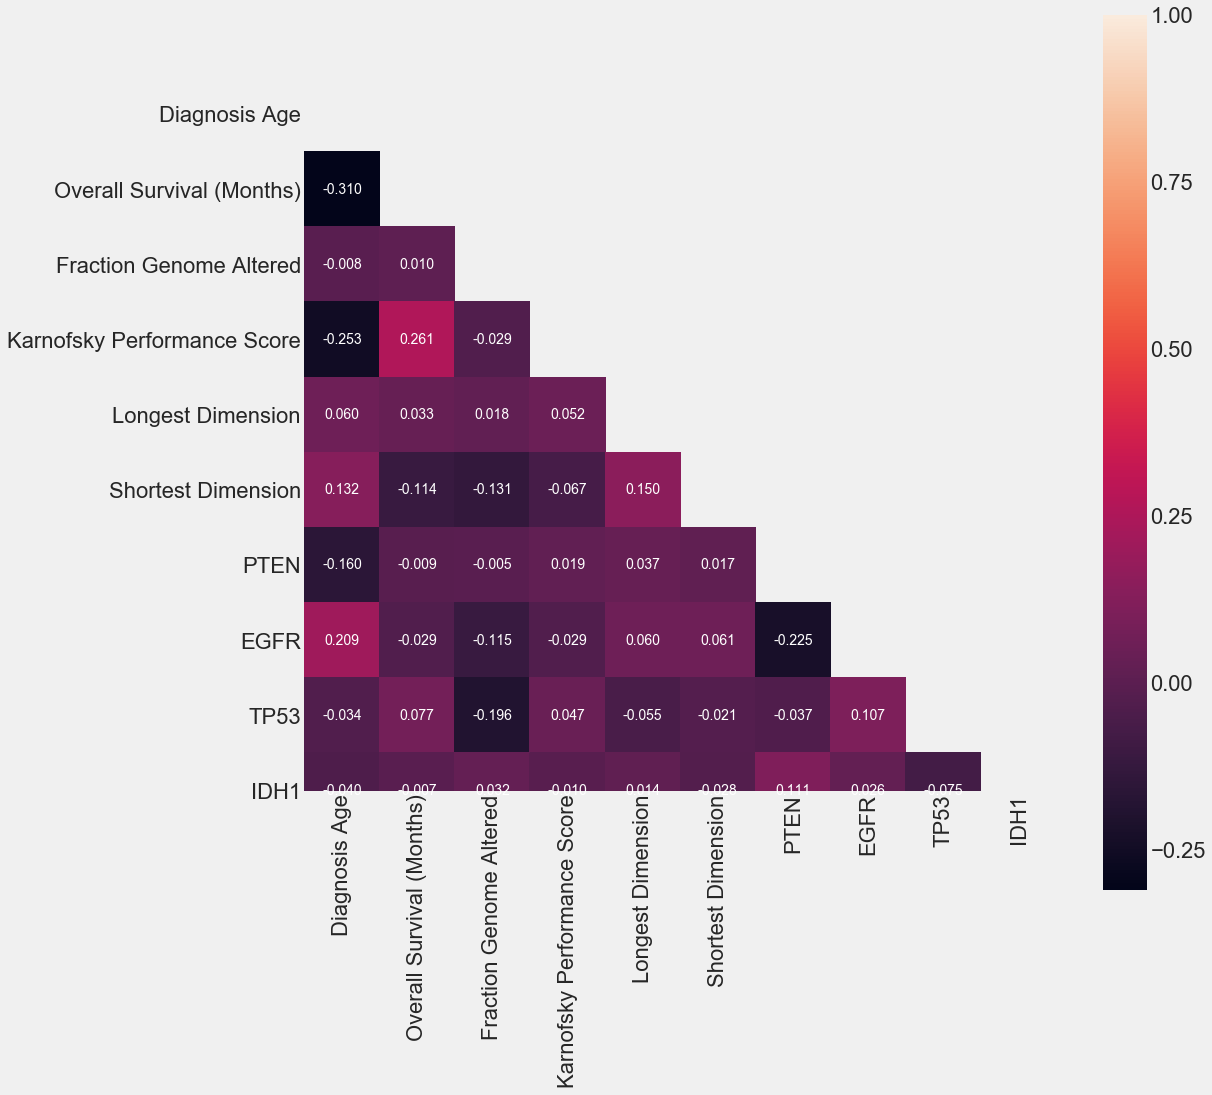

In [29]:
# visualize the correlation
f= plt.subplots(figsize=(15,15))
corr_matrix=df3.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     p2 = sns.heatmap(corr_matrix, annot=True,fmt='.3f',mask=mask, square=True)

The features do not appear to be highly correlated so we wont remove any features based on collinearity. 

In [30]:
# One hot encode categorical features
val_num = df3[['Diagnosis Age',
              'Overall Survival (Months)',
             'Fraction Genome Altered','Karnofsky Performance Score', 'Longest Dimension',
             'Shortest Dimension','PTEN', 'EGFR', 'TP53', 'IDH1']]
df_hot = pd.get_dummies(df3[['Sex']])
df27 = pd.concat([val_num,df_hot],axis=1)
df27.head()

,Diagnosis Age,Overall Survival (Months),Fraction Genome Altered,Karnofsky Performance Score,Longest Dimension,Shortest Dimension,PTEN,EGFR,TP53,IDH1,Sex_Female,Sex_Male
83,44.0,11.76,0.2459,80.0,2.0,0.2,0,1,-1,1,1,0
84,50.0,4.73,0.1480,100.0,2.1,0.1,-1,2,0,0,0,1
85,56.0,18.33,0.2391,80.0,1.3,0.1,-2,1,0,0,1,0
87,61.0,10.58,0.1594,80.0,1.2,0.1,-1,2,0,0,1,0
89,18.0,20.70,0.2939,80.0,0.7,0.1,-1,0,0,0,1,0


In [31]:
# missing values in the new dataset
missing_values_table(df27)

'Your selected dataframe has 12 columns.\nThere are 3 columns that have missing values.'

,Missing Values,% of Total Values
Karnofsky Performance Score,127,26.8
Longest Dimension,60,12.7
Shortest Dimension,60,12.7


We also impute the missing values. Here we will use the KNN imputer which will replace the missing values within the target variable based on its k nearest neighbors identified with the attributes variables.We use this approach because it is difficult to just impute based on the mean values for features like Karnofsky performance score. 

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imputer.fit(df27)
na31 = imputer.transform(df27) 
df31 = pd.DataFrame(na31,columns= df27.columns)
df31.shape

(473, 12)

In [33]:
# evaluate skweness
df31.skew()

Diagnosis Age                 -0.634985
Overall Survival (Months)      0.591525
Fraction Genome Altered        1.819871
Karnofsky Performance Score   -0.629742
Longest Dimension              1.073365
Shortest Dimension             0.612598
PTEN                           0.087581
EGFR                          -0.790385
TP53                          -0.727015
IDH1                          -0.296361
Sex_Female                     0.456785
Sex_Male                      -0.456785
dtype: float64

Some features like Fraction Genome Altered , Longest Dimension are a bit skewed. To address that we will use this function skew_autotransform [2]. 

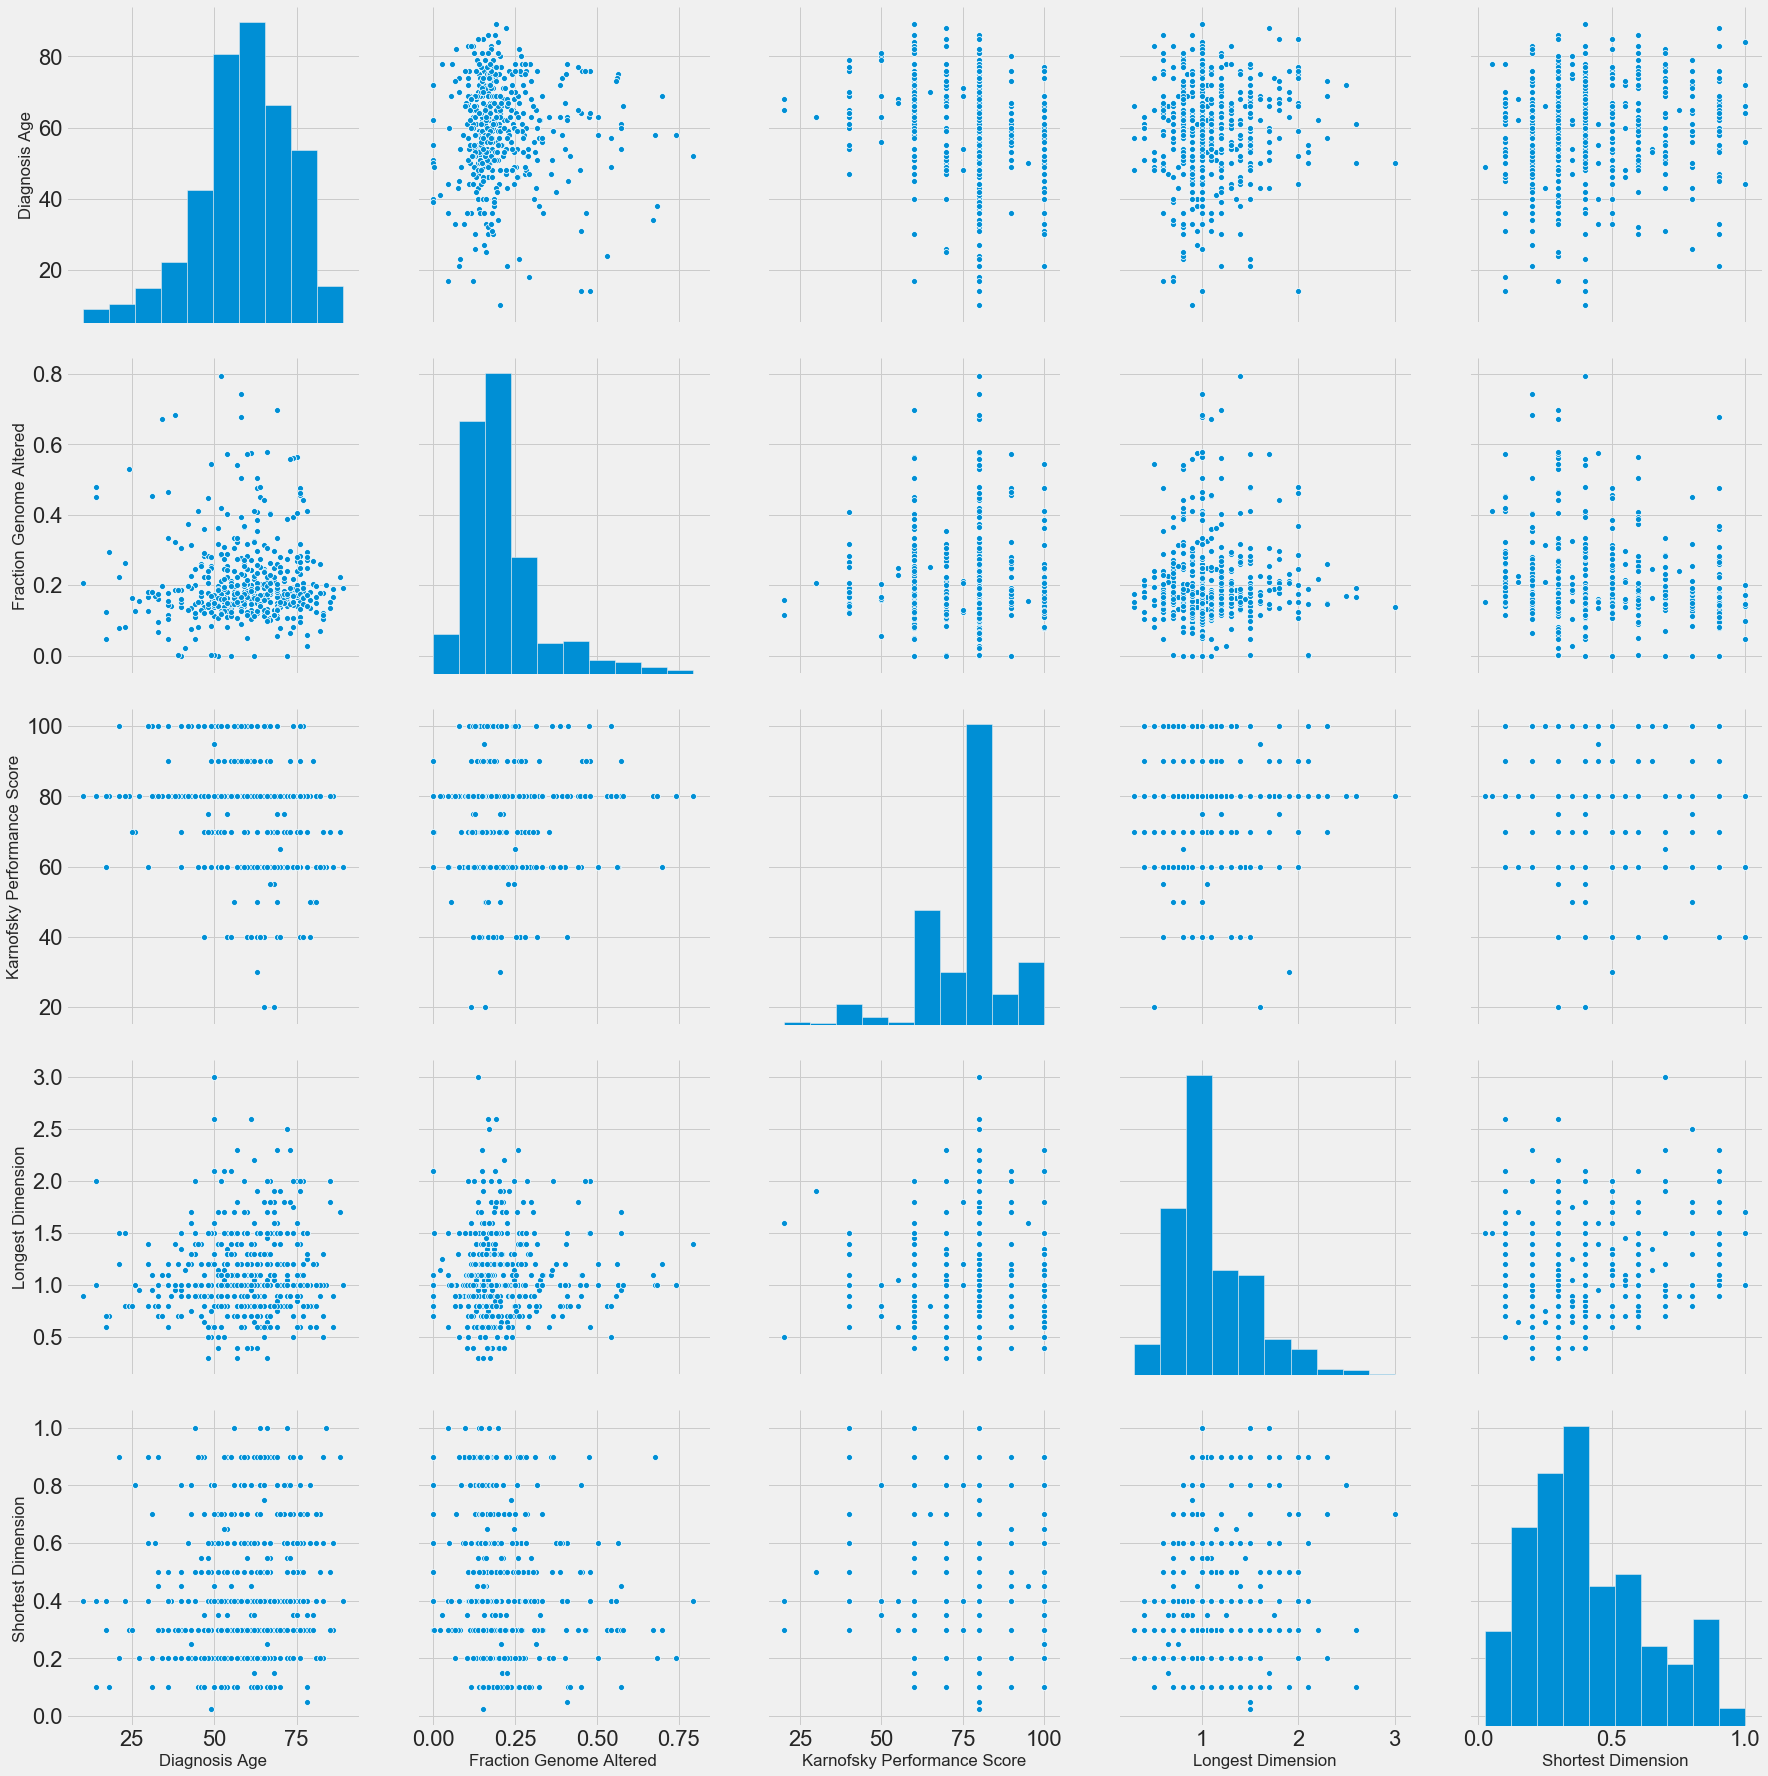

In [34]:
# visualization of the data
sns.pairplot(df31[['Diagnosis Age','Fraction Genome Altered','Karnofsky Performance Score', 'Longest Dimension',
             'Shortest Dimension']], size= 5)

In [35]:
# function to transform skewness
def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):
    
    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')
    
    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series
    
    
    #Go throug desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True
        
        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1.set(xlabel='Original ' + col)
        
        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply log transformation 
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
         
        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])
            
            if exp:
               #Apply exp transformation 
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()
        
        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew
        
        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')     
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2.set(xlabel='Transformed ' + col)
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2.set(xlabel='NO TRANSFORM ' + col)
                plt.show()
                

    return DF



 ------------------------------------------------------

 'Diagnosis Age' had 'negative' skewness of -0.63

 Transformation yielded skewness of -0.08


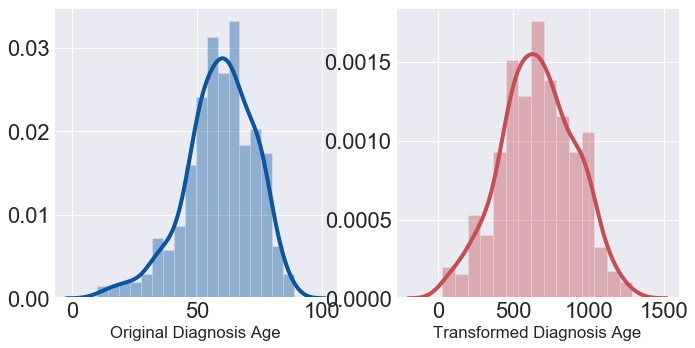


 ------------------------------------------------------

 'Fraction Genome Altered' had 'positive' skewness of 1.82

 Transformation yielded skewness of 0.20


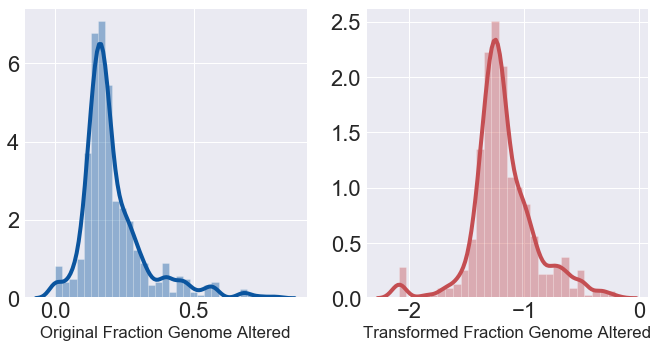


 ------------------------------------------------------

 'Karnofsky Performance Score' had 'negative' skewness of -0.63

 Transformation yielded skewness of -0.00


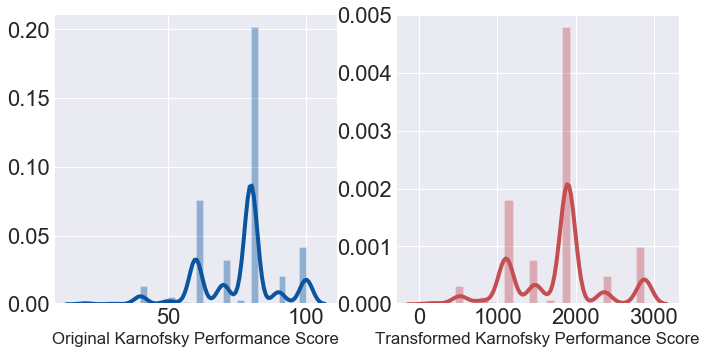


 ------------------------------------------------------

 'Longest Dimension' had 'positive' skewness of 1.07

 Transformation yielded skewness of 0.01


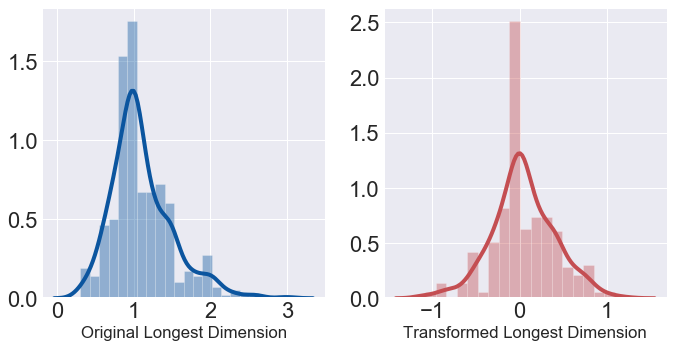


 ------------------------------------------------------

 'Shortest Dimension' had 'positive' skewness of 0.61

 Transformation yielded skewness of -0.04


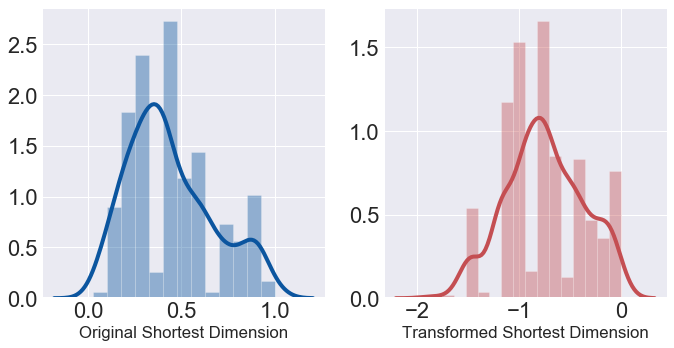


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'PTEN' . Skewness = 0.09


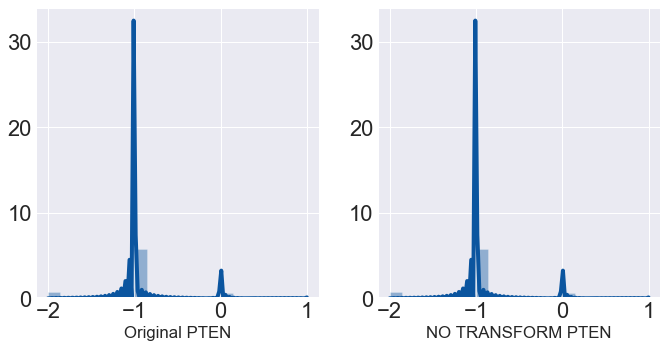


 ------------------------------------------------------

 'EGFR' had 'negative' skewness of -0.79

 Transformation yielded skewness of -0.40


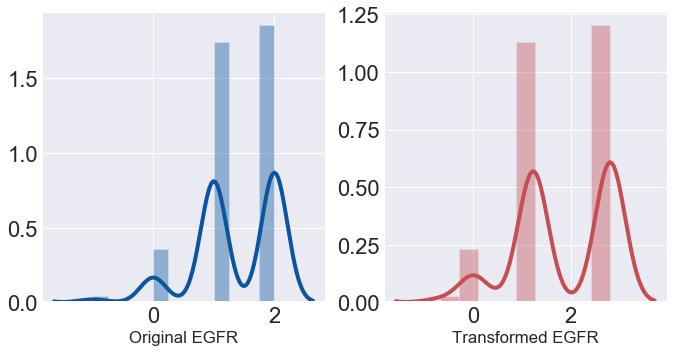


 ------------------------------------------------------

 'TP53' had 'negative' skewness of -0.73

 Transformation yielded skewness of -0.01


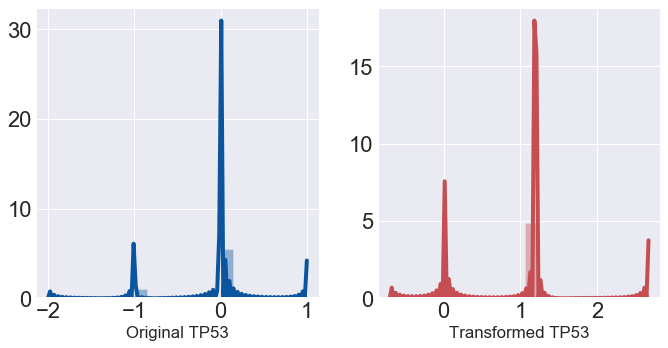


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'IDH1' . Skewness = -0.30


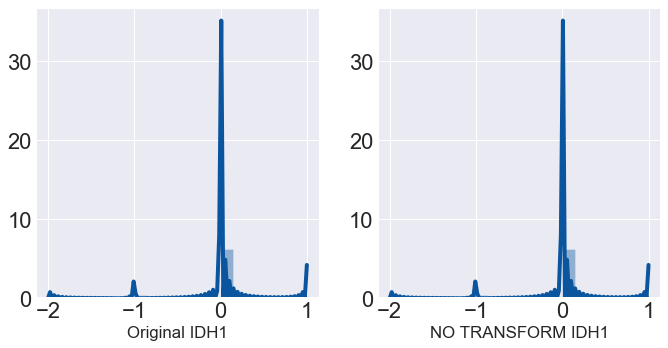


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Sex_Female' . Skewness = 0.46


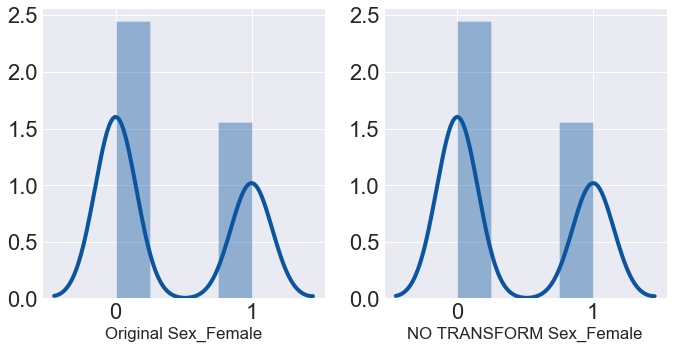


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Sex_Male' . Skewness = -0.46


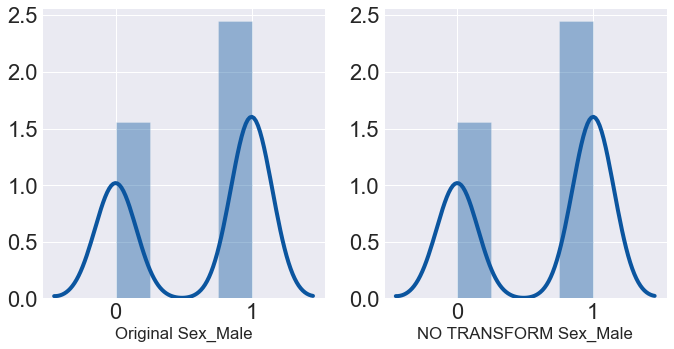

In [36]:
df36= skew_autotransform(df31, exclude =['Overall Survival (Months)'],plot = True, threshold = 0.5, exp = False)

In [37]:
# Evaluate skeweness after transformation
df36.skew()

Diagnosis Age                 -0.075958
Overall Survival (Months)      0.591525
Fraction Genome Altered        0.203785
Karnofsky Performance Score   -0.004809
Longest Dimension              0.011982
Shortest Dimension            -0.038197
PTEN                           0.087581
EGFR                          -0.401483
TP53                          -0.009834
IDH1                          -0.296361
Sex_Female                     0.456785
Sex_Male                      -0.456785
dtype: float64

Our data is ready for machine learning and to perform predictions

### Machine Learning 
Here we will be usuing supervised machine learning approach by splitting the dataset into test and train dataset. We will evaluate different algorithms starting with linear regression to see how our machine predicts. 

In [38]:
# Split Into Training and Testing Sets
from sklearn.model_selection import train_test_split
# Separate out the features and targets
features = df36.drop(columns=['Overall Survival (Months)'])
targets = pd.DataFrame(df36['Overall Survival (Months)'])

# Split into 75% training and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 11)
(142, 11)
(331, 1)
(142, 1)


In [40]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dum_preds = dummy_regr.predict(X_test)
MAE_Dummy = metrics.mean_absolute_error(y_test, dum_preds)
R2_Dummy = r2_score(y_test, dum_preds)
# for dummy  regression 
print('MAE DummyRegressor:', metrics.mean_absolute_error(y_test, dum_preds))
print('MSE DummyRegressor:', metrics.mean_squared_error(y_test, dum_preds))
print('RMSE DummyRegressor:', np.sqrt(metrics.mean_squared_error(y_test, dum_preds)))
print('R-square DummyRegressor:',  r2_score(y_test, dum_preds))

MAE DummyRegressor: 6.516299306412494
MSE DummyRegressor: 64.5171983318959
RMSE DummyRegressor: 8.032259852114839
R-square DummyRegressor: -0.0019244635721835657


In [41]:
num_folds = 30
seed = 7
scoring = 'neg_mean_squared_error'

# create a baseline of performance
# spot-check a number of different algorithms:
#   - 3 linear algorithms: LR, LASSO,EN     (with default tuning params)
#   - 3 nonlinear algorithm: CART, SVR, KNN (with default tuning params)
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('RIDGE', Ridge()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('SVR', SVR()))



# evaluate each model in turn
results = []
names = []
for name, model in models:
    names.append(name)
    
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    
    msg = name + ': ' + str(cv_results.mean()) + ' (' + str(cv_results.std()) + ')'
    print(msg)
    

LR: -53.99357498604995 (21.282405550598444)
LASSO: -52.62830115044834 (21.477461015967048)
EN: -52.62838155106762 (21.477923133930297)
RIDGE: -53.93529388611229 (21.2844270629938)
KNN: -63.43895576161617 (31.89689339714156)
CART: -102.84469883838383 (35.99440122838856)
RF: -57.63301370818183 (20.25360086639797)
SVR: -53.588044408716385 (23.705488776032148)


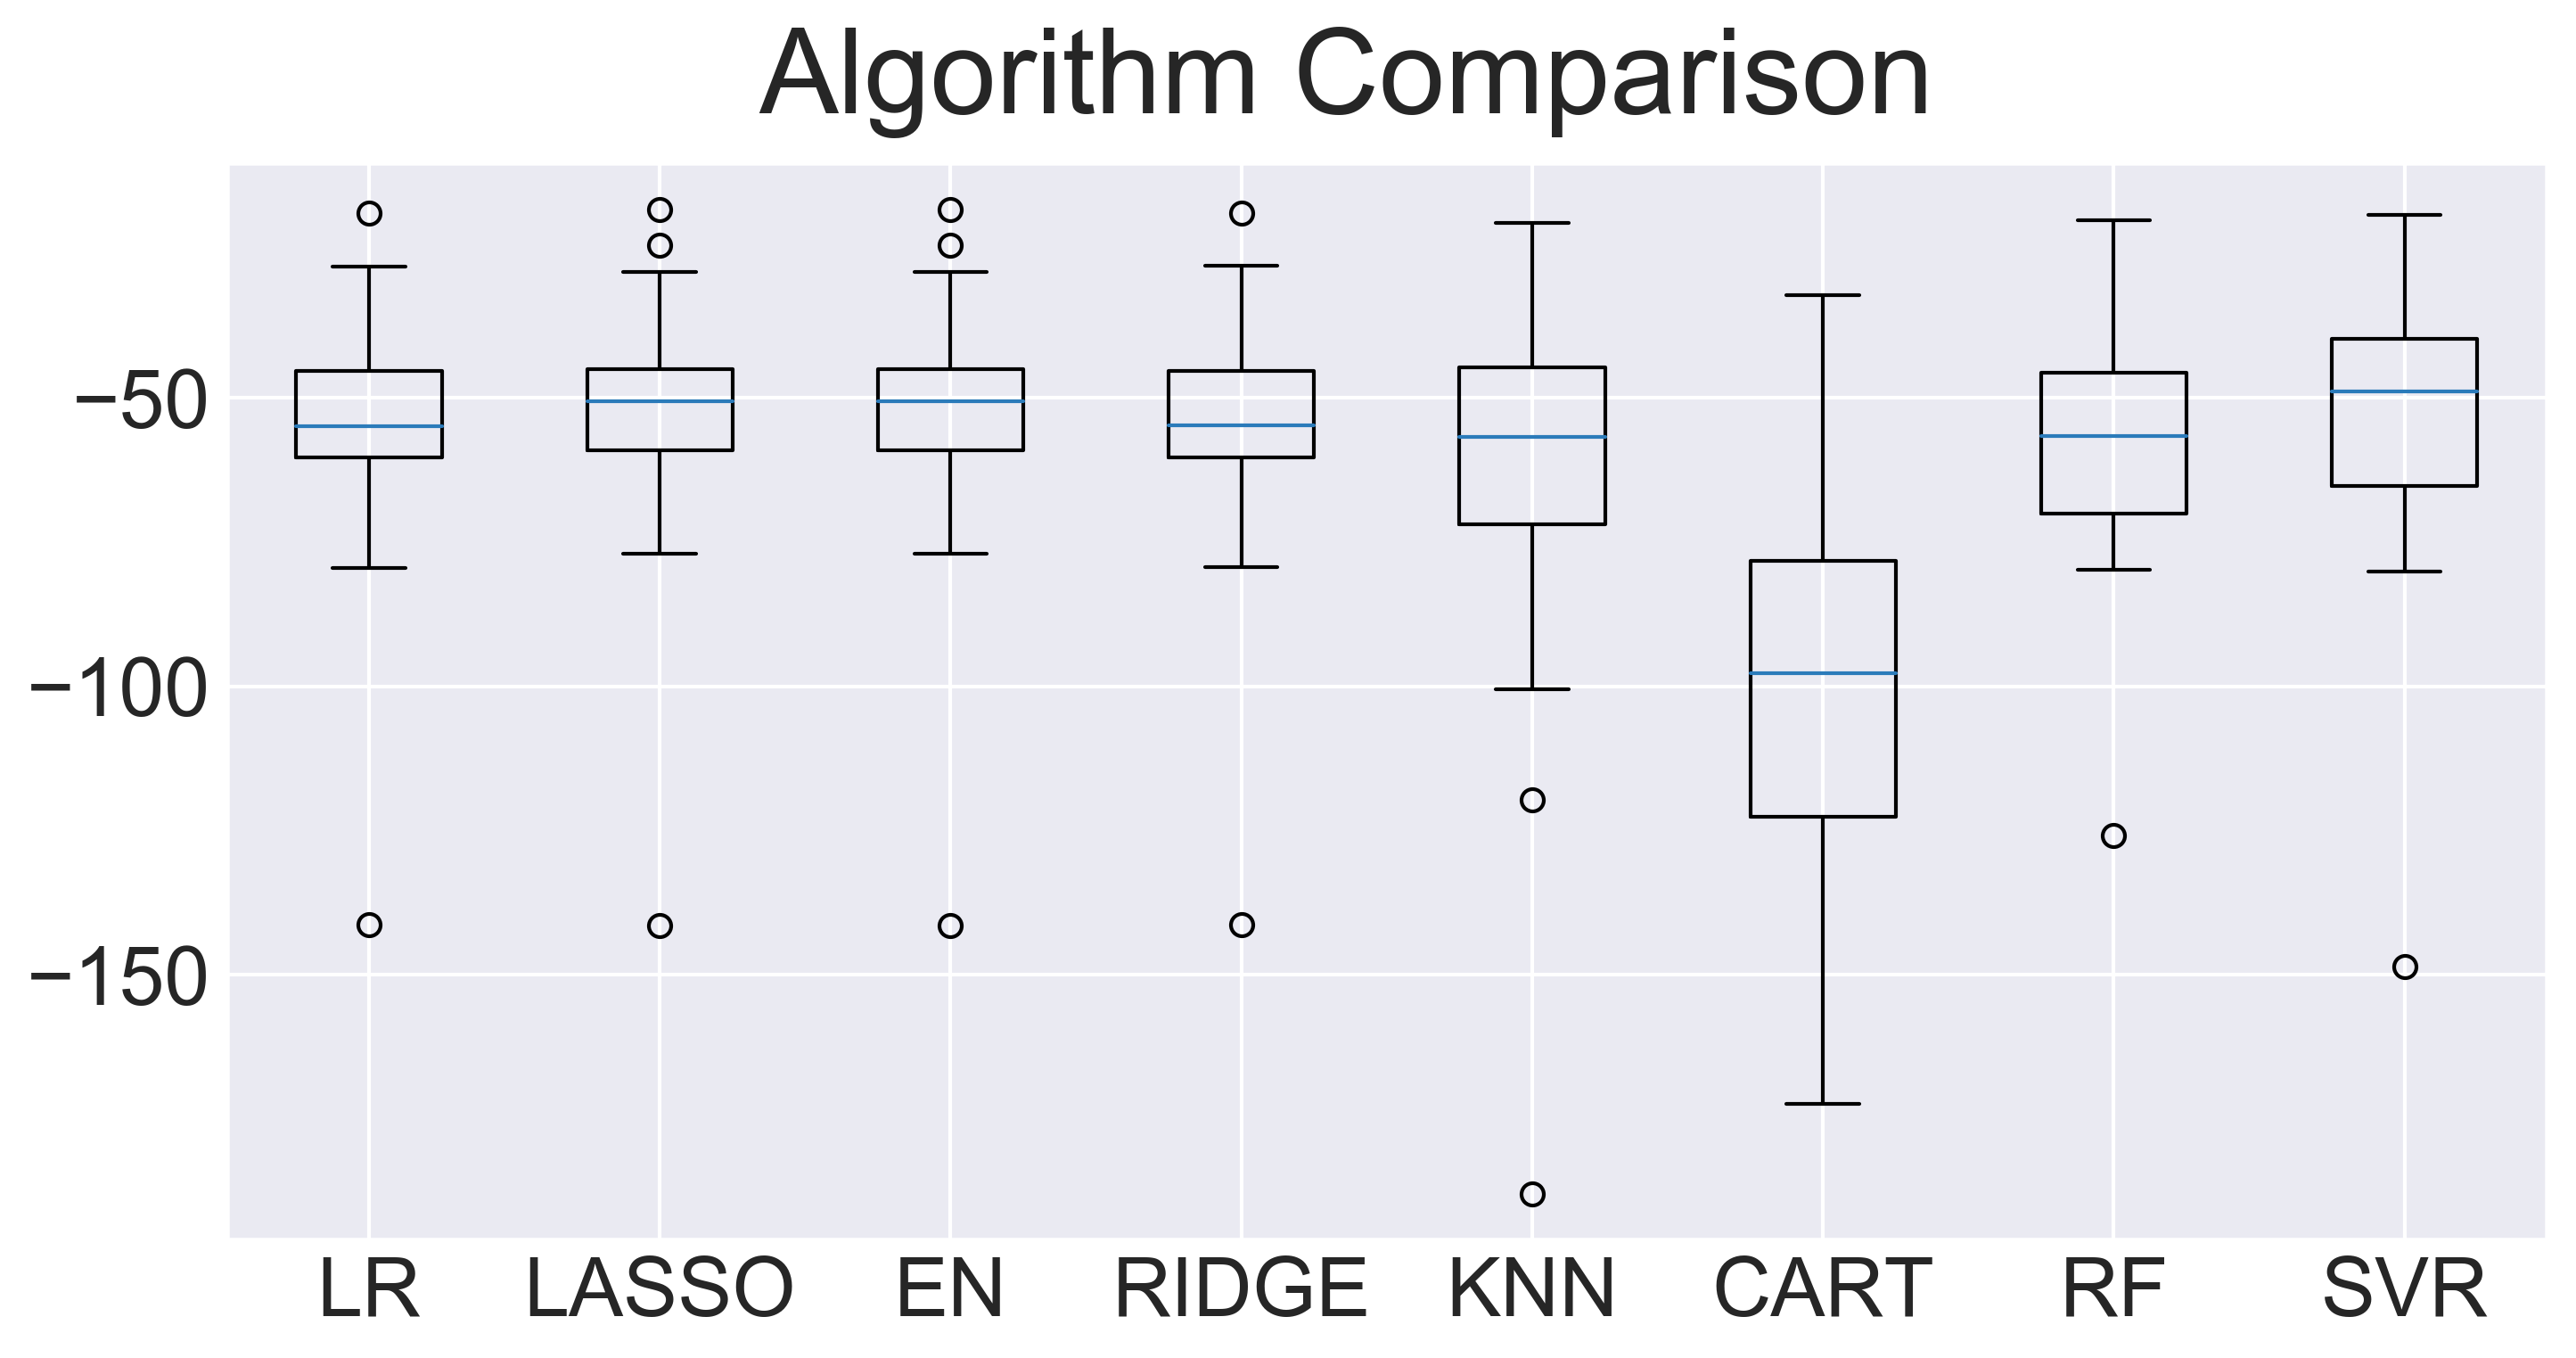

In [42]:
# take a look at the distribution of scores
fig = plt.figure(figsize=(10,5),dpi =300)
fig.suptitle('Algorithm Comparison',fontsize = 32)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Lasso and Elasticnet has the lowest MSE, followed closely by SVR.

In [43]:
from sklearn import model_selection
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
lin_preds = linreg_model.predict(X_test)
MAE_linear = metrics.mean_absolute_error(y_test, lin_preds)
R2_linear = r2_score(y_test, lin_preds)
# for linear regression 
print('MAE linear regression :', metrics.mean_absolute_error(y_test, lin_preds))
print('MSE linear regression:', metrics.mean_squared_error(y_test, lin_preds))
print('RMSE linear regression:', np.sqrt(metrics.mean_squared_error(y_test, lin_preds)))
print('R-square linear regression:',  r2_score(y_test, lin_preds))

MAE linear regression : 6.113469527661107
MSE linear regression: 57.39199564820177
RMSE linear regression: 7.575750500656801
R-square linear regression: 0.10872688306532208


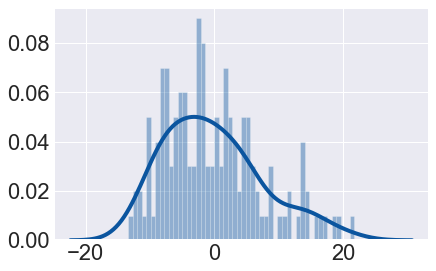

In [44]:
# Residuals: Plot a histogram of the residuals and make sure it looks normally distributed.
#to make sure everything was okay with our data
sns.distplot((y_test-lin_preds),bins=50)

In [45]:
# coefficients of the linear regession model
coeffecients = linreg_model.coef_
x = np.transpose(coeffecients)
coeffecients =pd.DataFrame(x,  X_train.columns)
coeffecients.columns = ['Coeffecient']
# calculate the number of days a patient survives if one of the feature changes by 1 unit
coeffecients['Survival (in days)']=coeffecients['Coeffecient']*30
coeffecients

,Coeffecient,Survival (in days)
Diagnosis Age,-0.007296,-0.218893
Fraction Genome Altered,0.281287,8.438603
Karnofsky Performance Score,0.002707,0.081205
Longest Dimension,0.528863,15.865884
Shortest Dimension,-1.598743,-47.962303
PTEN,-1.160427,-34.812797
EGFR,-0.442691,-13.280732
TP53,1.051057,31.531707
IDH1,1.245653,37.369596
Sex_Female,0.240134,7.204017


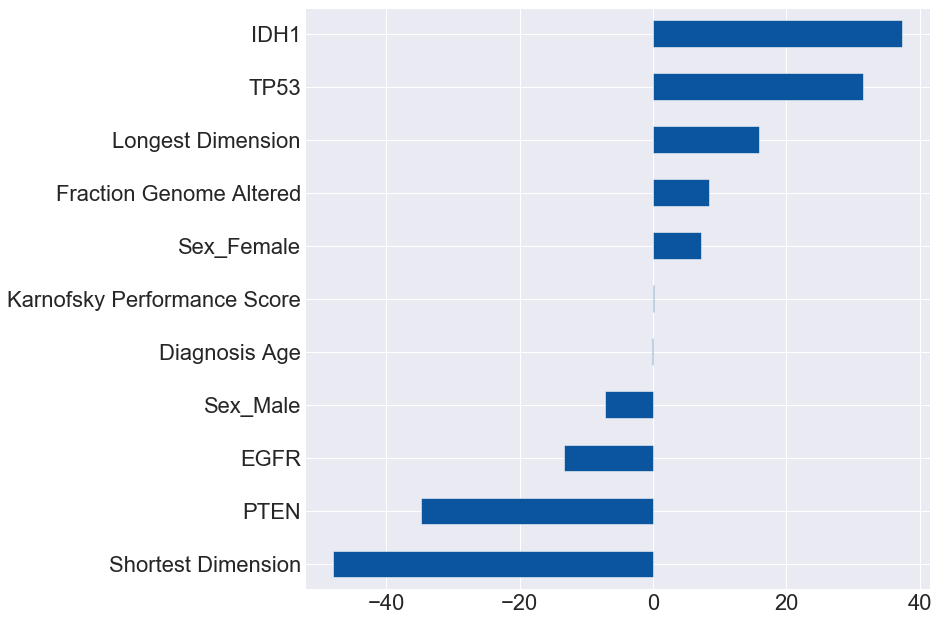

In [46]:
coeffecients.sort_values('Survival (in days)', inplace = True)
coeffecients.plot(kind='barh',y='Survival (in days)',figsize =(10,10), legend =False )

This shows genetic features are important for prediction of overall survival. 

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.31623, score: 0.13665
[fold 1] alpha: 0.31623, score: 0.13665
[fold 2] alpha: 0.31623, score: 0.13665


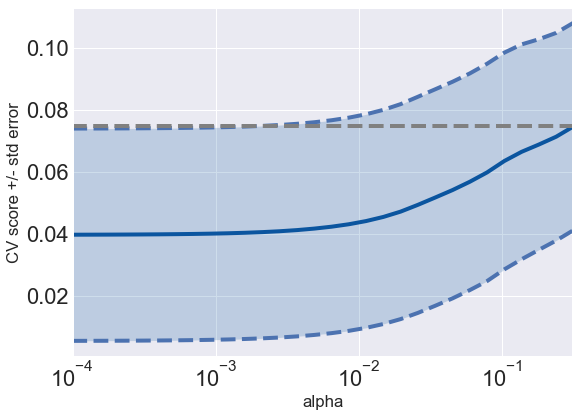

In [47]:
from sklearn.linear_model import LassoCV
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

# #############################################################################
# To identify the best alpha value we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(features, targets)):
    lasso_cv.fit(X_train, y_train)
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_test, y_test)))
plt.show()

Since the alpha remained same for the validations, we used it to do our prediction.

In [48]:
Lasso_reg = Lasso(alpha=0.31623, tol =2)
Lasso_reg.fit(X_train, y_train)
Lasso_preds = Lasso_reg.predict(X_test)
MAE_Lasso=metrics.mean_absolute_error(y_test, Lasso_preds)
R2_Lasso=r2_score(y_test, Lasso_preds)
#for Lasso regression 
print('MAE Lasso regression :', metrics.mean_absolute_error(y_test, Lasso_preds))
print('MSE Lasso regression:', metrics.mean_squared_error(y_test, Lasso_preds))
print('RMSE Lasso regression:', np.sqrt(metrics.mean_squared_error(y_test, Lasso_preds)))
print('R-square Lasso regression:',  Lasso_reg.score(X_test,y_test))

MAE Lasso regression : 5.897089978942438
MSE Lasso regression: 55.300947599441244
RMSE Lasso regression: 7.436460690371546
R-square Lasso regression: 0.14119996386744194


In [49]:
# To save the model for making predictions in the app
import pickle

pkl_filename = 'Lassoglioma1.pkl'

with open(pkl_filename, 'wb') as file:
     pickle.dump(Lasso_reg, file)

In [50]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=500, random_state=1, n_jobs=-1, criterion='mae')
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)
MAE_Random =metrics.mean_absolute_error(y_test, forest_preds)

# for Random Forest regression 
print('MAE Random Forest regression :', metrics.mean_absolute_error(y_test, forest_preds))
print('MSE Random Forest regression:', metrics.mean_squared_error(y_test, forest_preds))
print('RMSE Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, forest_preds)))
print('R-square Random Forest regression:',  r2_score(y_test, forest_preds))

MAE Random Forest regression : 6.531829647887323
MSE Random Forest regression: 66.5744110546528
RMSE Random Forest regression: 8.159314374054526
R-square Random Forest regression: -0.03387209624988907


<bound method PimpViz.save of <rfpimp.PimpViz object at 0x1a31de1e50>>

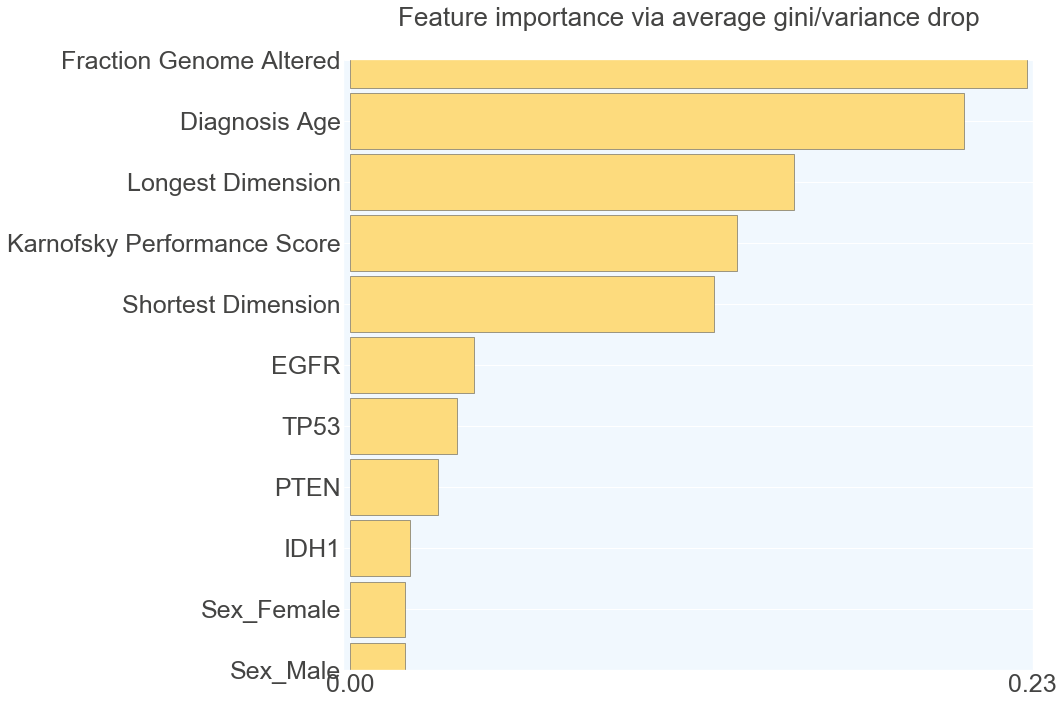

In [51]:
from rfpimp import *
I = pd.DataFrame()
plt.figure(figsize=(10,5),dpi =300)
I['Feature'] = X_train.columns
I['Importance'] = forest_model.feature_importances_
I = I.sort_values('Importance', ascending=False)
I = I.set_index('Feature')
viz = plot_importances(I, minheight=10,label_fontsize = 25,
                         width=15,
                 color='#FDDB7D',
                 bgcolor='#F1F8FE',
                 title="Feature importance via average gini/variance drop\n")
viz.save

<bound method PimpViz.save of <rfpimp.PimpViz object at 0x1a31eca410>>

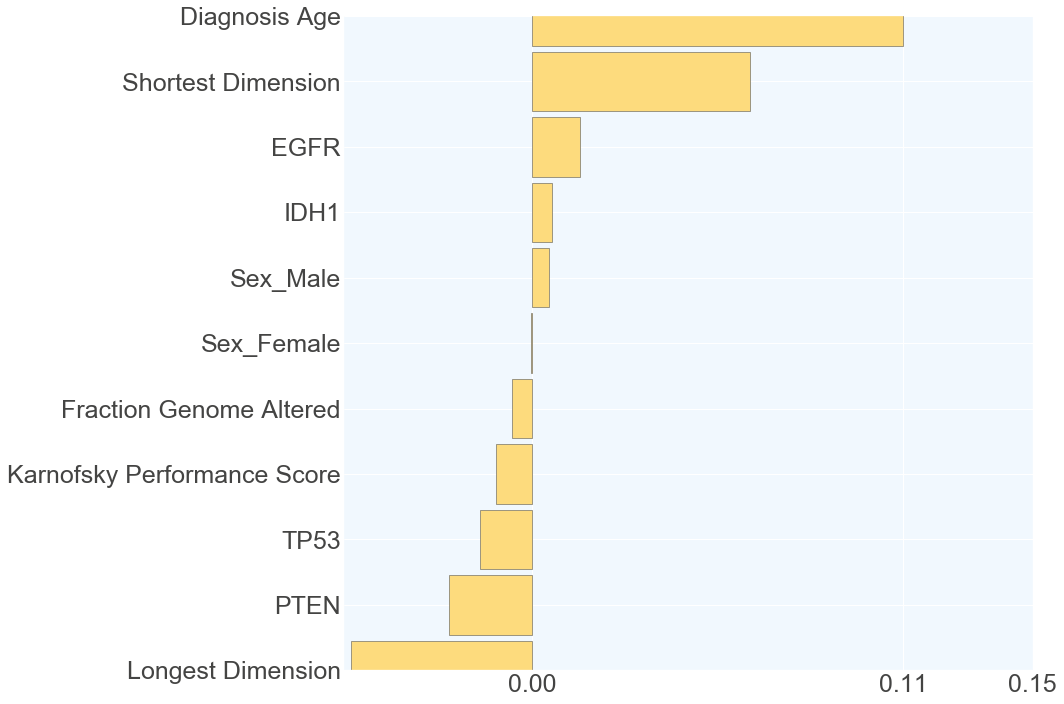

In [52]:
# Permutation importance
I = importances(forest_model, X_test, y_test, features= X_train.columns)
viz = plot_importances(I,minheight=10,label_fontsize = 25,color='#FDDB7D',
                         bgcolor='#F1F8FE',width=15, title=None)
viz.save

In [53]:
## get parameters for random forest
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(forest_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


In [55]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, 
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.1s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.2s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.2s
[CV] n_estimators=377, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=377,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [57]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40,50,60,70,80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200,250, 300,350]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, verbose = 2, return_train_score=True)



In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);
grid_search.best_params_

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=2, 

[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=2, 

[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=2, 

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=40, max_features=3, 

[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=40, max_features=3, 

[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=2, 

[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=50, max_features=2, 

[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, max_features=3, 

[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=50, max_features=3, 

[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=50, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=60, max_features=2, 

[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=2, 

[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=2, 

[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=60, max_features=3, 

[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=60, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=60, max_features=3, 

[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=2, 

[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=70, max_features=2, 

[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=70, max_features=3, 

[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=70, max_features=3, 

[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=70, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=70, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=2, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_sam

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=3, 

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samp

[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2,

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=350 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_feat

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3,

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=2,

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_fea

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=110, max_features=3

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250, total=   0.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=250 
[CV]  bootstrap=True, max_depth=110, max_features=3,

[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350, total=   0.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=350 
[CV]  bootstrap=True, max_depth=110, max_fea

[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  5.0min finished


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [59]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [60]:
forest_model = RandomForestRegressor(n_estimators= 100,min_samples_split =12,min_samples_leaf =5,
                                     max_features =3,max_depth =40,bootstrap =True,random_state=1, n_jobs=-1)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)
MAE_forest =  metrics.mean_absolute_error(y_test, forest_preds)
R2_forest =  r2_score(y_test, forest_preds)
# for Random Forest regression 
print('MAE Random Forest regression :', metrics.mean_absolute_error(y_test, forest_preds))
print('MSE Random Forest regression:', metrics.mean_squared_error(y_test, forest_preds))
print('RMSE Random Forest regression:', np.sqrt(metrics.mean_squared_error(y_test, forest_preds)))
print('R-square Random Forest regression:',  r2_score(y_test, forest_preds))

MAE Random Forest regression : 6.29049542421407
MSE Random Forest regression: 59.81499210581647
RMSE Random Forest regression: 7.734015264131334
R-square Random Forest regression: 0.07109878561533212


After doing the grid search and inputting the best parameters , we got a decrease in mean absolute error from 6.8 to 6.5. however it is not better than Lasso linear Model. 

In [61]:
svm = SVR(C = 1000, gamma = 0.1)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

# for SVR regression 
print('MAE SVR regression :', metrics.mean_absolute_error(y_test, svm_preds))
print('MSE SVR  regression:', metrics.mean_squared_error(y_test, svm_preds))
print('RMSE SVR  regression:', np.sqrt(metrics.mean_squared_error(y_test, svm_preds)))
print('R-square SVR  regression:',  r2_score(y_test, svm_preds))

MAE SVR regression : 7.986617427825989
MSE SVR  regression: 102.29302837506644
RMSE SVR  regression: 10.11400160050741
R-square SVR  regression: -0.588566928381232


In [62]:
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle
# Setting a seed to a constant value makes sure that you get the same result each time you run your script.
seed = 42
X, y = shuffle(X_train, y_train, random_state=seed)
def svr_model(X, y):
    gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

    scoring = {'R2':'r2',
               'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error'}

    scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)
    MAE = abs(scores['test_abs_error'].mean())
    RMSE = math.sqrt(abs(scores['test_squared_error'].mean()))
    R = (scores['test_R2'].mean())
    return MAE,RMSE,R

MAE_SVR, RMSE_SVR, R2_SVR = svr_model(X_train,y_train)

print("MAE :",MAE_SVR , "| RMSE :",RMSE_SVR ,'| r2:',R2_SVR)

MAE : 6.138322174552331 | RMSE : 7.546349649349793 | r2: 0.00728303481989413


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
MAE_KNN = metrics.mean_absolute_error(y_test, knn_pred)
R2_KNN = r2_score(y_test, knn_pred)
# for KNN regression 
print('MAE KNN regression :', metrics.mean_absolute_error(y_test, knn_pred))
print('MSE KNN regression :', metrics.mean_squared_error(y_test, knn_pred))
print('RMSE KNN regression :', np.sqrt(metrics.mean_squared_error(y_test, knn_pred)))
print('R-square KNN regression :',  r2_score(y_test, knn_pred))

MAE KNN regression : 6.111232394366198
MSE KNN regression : 57.89728104929578
RMSE KNN regression : 7.609026287856796
R-square KNN regression : 0.10088001715156014


In [64]:
gb = GradientBoostingRegressor(random_state=60)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
MAE_gb= metrics.mean_absolute_error(y_test, gb_pred)
R2_gb = r2_score(y_test, gb_pred)
# for 'Gradient Boosting regression' 
print('MAE Gradient Boosting regression:', metrics.mean_absolute_error(y_test, gb_pred))
print('MSE Gradient Boosting regression:', metrics.mean_squared_error(y_test, gb_pred))
print('RMSE Gradient Boosting regression:', np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))
print('R-square Gradient Boosting regression:',  r2_score(y_test, gb_pred))

MAE Gradient Boosting regression: 6.714820805560028
MSE Gradient Boosting regression: 73.98612824979851
RMSE Gradient Boosting regression: 8.60151895015052
R-square Gradient Boosting regression: -0.1489728905635792


In [65]:
import xgboost as xgb
from xgboost import XGBRegressor
xg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)
MAE_xg = metrics.mean_absolute_error(y_test, xg_pred)
R2_xg = r2_score(y_test, xg_pred)
# for xgboost regression
print('MAE xgboost regression:', metrics.mean_absolute_error(y_test, xg_pred))
print('MSE xgboost regression:', metrics.mean_squared_error(y_test, xg_pred))
print('RMSE xgboost regression:', np.sqrt(metrics.mean_squared_error(y_test, xg_pred)))
print('R-square xgboost regression:',  r2_score(y_test, xg_pred))

[09:31:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE xgboost regression: 7.464896862515263
MSE xgboost regression: 89.15294842585959
RMSE xgboost regression: 9.442083902712346
R-square xgboost regression: -0.3845071134047964


<Figure size 2016x1440 with 0 Axes>

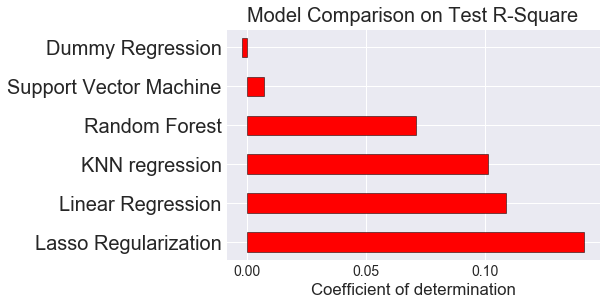

In [66]:
plt.figure(figsize =(28, 20))

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Dummy Regression','Linear Regression', 'Lasso Regularization',
                                           'Random Forest', 'Support Vector Machine','KNN regression'],
                                 'mae': [R2_Dummy, R2_linear, R2_Lasso, R2_forest, 
                                         R2_SVR,R2_KNN]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', 
                                                            kind = 'barh',color = 'red', edgecolor = 'black',legend=False)

# Plot formatting

plt.ylabel('')
plt.yticks(size = 20)
plt.xlabel('Coefficient of determination')
plt.xticks(size = 14)
plt.figsize = (12,8)
plt.title('Model Comparison on Test R-Square', size = 20);

This shows a comparisison between all the models. Using Lasso regularization, we got the best Coefficient of determination indicating it is performing better compared to the dummy regression. Using that model, I have built a web app for the doctors to make more accurate prognosis.It can be accessed from here: https://obscure-reef-35666.herokuapp.com/

### Conclusion
1. Genetic features play an important role in predicting prognosis.
2. More data will help improve the Coefficient of determination. 
